In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/siwatis/Credit-Analysis-Prediction/main/loan_approval_dataset.csv')
df.head()

,loan_id,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
0,1,2,Graduate,No,9600000,29900000,12,778,2400000,17600000,22700000,8000000,Approved
1,2,0,Not Graduate,Yes,4100000,12200000,8,417,2700000,2200000,8800000,3300000,Rejected
2,3,3,Graduate,No,9100000,29700000,20,506,7100000,4500000,33300000,12800000,Rejected
3,4,3,Graduate,No,8200000,30700000,8,467,18200000,3300000,23300000,7900000,Rejected
4,5,5,Not Graduate,Yes,9800000,24200000,20,382,12400000,8200000,29400000,5000000,Rejected


Data Cleaning

In [3]:
# Columns name: replace widespaces
df.columns = [col.replace(' ','') for col in df.columns]

# Drop loan_id column
df.drop(columns=['loan_id'], inplace=True)

# Set data type to each variables and clean space for categorical variable
categorical_col = ['no_of_dependents','education','self_employed','loan_term','loan_status']
measure_col = ['income_annum','loan_amount','cibil_score','residential_assets_value','commercial_assets_value','luxury_assets_value','bank_asset_value']
for col in categorical_col:
    df[col] = df[col].astype(str).str.strip()
    df[col] = df[col].astype('category')
for col in measure_col:
    df[col] = df[col].astype(float)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4269 entries, 0 to 4268
Data columns (total 12 columns):
 #   Column                    Non-Null Count  Dtype   
---  ------                    --------------  -----   
 0   no_of_dependents          4269 non-null   category
 1   education                 4269 non-null   category
 2   self_employed             4269 non-null   category
 3   income_annum              4269 non-null   float64 
 4   loan_amount               4269 non-null   float64 
 5   loan_term                 4269 non-null   category
 6   cibil_score               4269 non-null   float64 
 7   residential_assets_value  4269 non-null   float64 
 8   commercial_assets_value   4269 non-null   float64 
 9   luxury_assets_value       4269 non-null   float64 
 10  bank_asset_value          4269 non-null   float64 
 11  loan_status               4269 non-null   category
dtypes: category(5), float64(7)
memory usage: 255.3 KB


Exploratory Data Analysis

In [5]:
df_measure_melt = df[measure_col + ['loan_status']].melt(id_vars='loan_status')

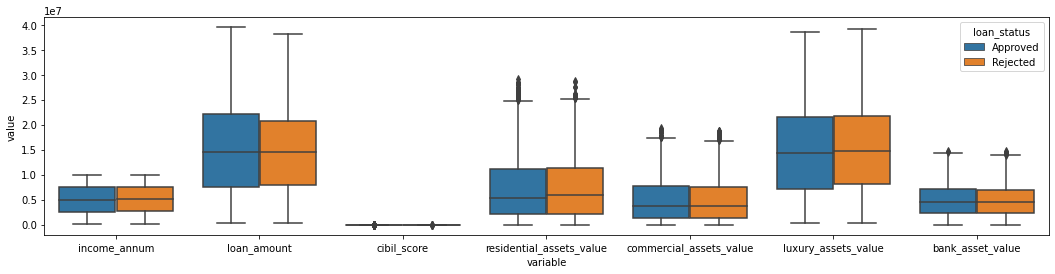

In [6]:
plt.subplots(figsize=[18,4])
sns.boxplot(data=df_measure_melt, x='variable', y='value', hue='loan_status');

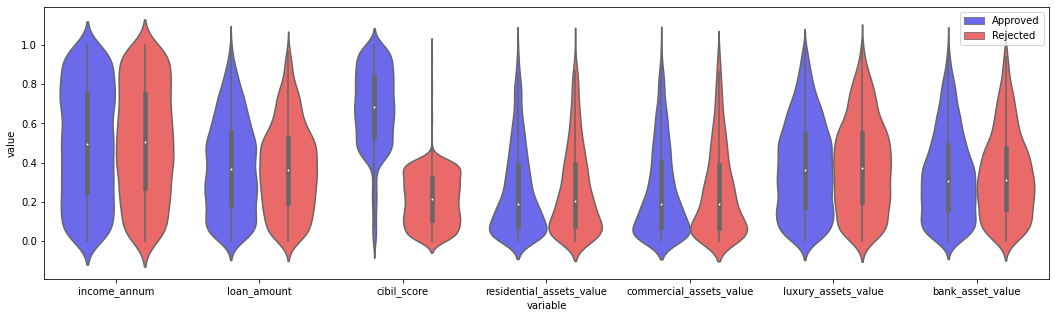

In [27]:
# New visualization with min-max normalized scale

def normalize(data, column_name=measure_col, include_target=True):
    data_ = data[column_name].copy()
    for col in data_.columns:
        data_[col] = (data_[col] - data_[col].min())/(data_[col].max() - data_[col].min())
    if include_target:
        data_['loan_status'] = data['loan_status']
    return data_

df_normalized_melt = normalize(df).melt(id_vars='loan_status')

plt.subplots(figsize=[18,5])
sns.violinplot(data=df_normalized_melt, x='variable', y='value', hue='loan_status', palette='seismic')
plt.legend(loc='upper right')
plt.show()

In [32]:
df_normalized_melt.pivot_table(index='loan_status', columns='variable', values='value', aggfunc='median')

variable,bank_asset_value,cibil_score,commercial_assets_value,income_annum,loan_amount,luxury_assets_value,residential_assets_value
loan_status,,,,,,,
Approved,0.306122,0.685,0.190722,0.494845,0.364796,0.362468,0.188356
Rejected,0.312925,0.215,0.190722,0.505155,0.362245,0.372751,0.205479


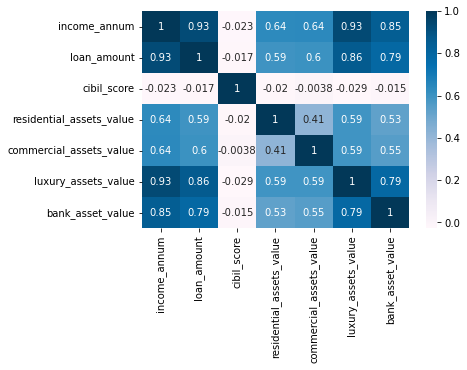

In [85]:
sns.heatmap(df[measure_col].corr(), cmap='PuBu', annot=True);

In [34]:
df[categorical_col].melt(id_vars='loan_status').pivot_table()

,loan_status,variable,value
0,Approved,no_of_dependents,2
1,Rejected,no_of_dependents,0
2,Rejected,no_of_dependents,3
3,Rejected,no_of_dependents,3
4,Rejected,no_of_dependents,5
...,...,...,...
17071,Rejected,loan_term,12
17072,Approved,loan_term,20
17073,Rejected,loan_term,18
17074,Approved,loan_term,8
